# Dataset Preparation

In [1]:
import numpy as np
import os
from pathlib import Path
from keras_preprocessing import image

In [2]:
path = Path("./images")

print(type(path))
print(path)

dirs = path.glob("*") #Creating a Generator to iterate over each folder

<class 'pathlib.PosixPath'>
images


In [3]:
#This is to represent different categories/labels in form of numbers

label_dict = {
    "cat" : 0,
    "dog" : 1,
    "horse" : 2,
    "human" : 3
}


In [4]:
# Load all the Images out there
image_data = [] # X Matrix
    
labels = [] # Y Vector

for folder in dirs:
    
    label = str(folder).split("/")[-1][:-1]
    # Load all the images i.e. X matrix along with Labels i.e. Y vector
    
    for image_path in folder.glob("*.jpg"):
        
        img = image.load_img(image_path, target_size = (32, 32)) # Loading an image using Keras
        
        # Converting loaded image into a numpy arr ay
        img_array = image.img_to_array(img)
        
        # Prepare X Matrix
        image_data.append(img_array)
        # Prepare Y Vector
        labels.append(label_dict[label]) 

In [5]:
len(image_data)

808

In [6]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

### Preparing a Numpy array

In [7]:
x = np.array(image_data)
y = np.array(labels)
print(x.shape, y.shape)

(808, 32, 32, 3) (808,)


```x.shape``` signifies that there are ```808``` images each of ```32X32X3``` size

### Shuffle the Data 

In [8]:
import random 

combined_data = list(zip(x, y))
random.shuffle(combined_data)

In [9]:
x[:], y[:] = zip(*combined_data)

### Have a look at Dataset

In [10]:
x = x.astype("uint8")

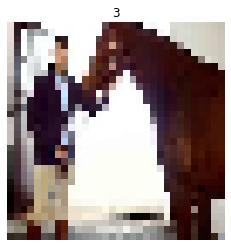

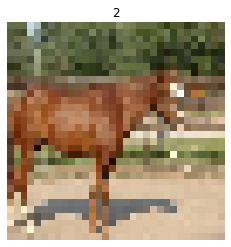

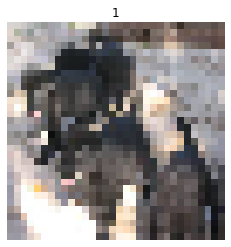

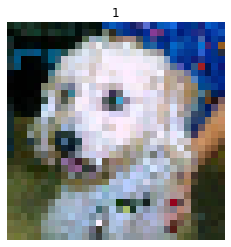

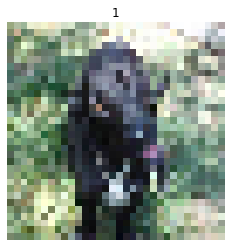

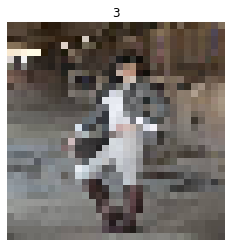

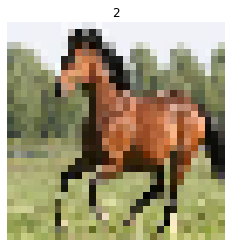

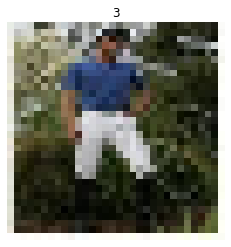

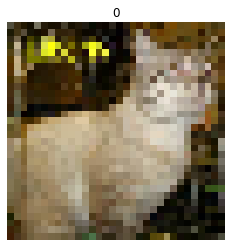

In [11]:
import matplotlib.pyplot as plt

# will be viusalizing only 9 images 
for i in range(9):
    plt.imshow(x[i])
    plt.axis("off")
    plt.title(y[i])
    plt.show()    

In [12]:
class SVM:
    
    def __init__(self, C = 1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
        
        
    
    def HingeLoss(self, W, B, X, Y):
                
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T) #First Term
        
        m = X.shape[0]
        
        for i in range(m):
            
            ti = Y[i] * (np.dot(W, X[i].T) + B)
            
            loss += self.C * max(0, (1 - ti)) # 1 - ti is for outliers
        
        return loss
    
    
    
    
    def fit(self, X, Y, batch_size = 100, Lr = 0.001, MaxItr = 20):
        
        #Initialization
        features = X.shape[1]
        samples  = X.shape[0]
        c = self.C        
        W = np.zeros((1, features))
        bias = 0     
        losses = []
        
        
        for i in range(MaxItr):
            
            losses.append(*self.HingeLoss(W, bias, X, Y)[0]) # Loss gets recorded   
            
            random_ids = np.arange(samples)
            np.random.shuffle(random_ids)
            
            for batch_start in range(0, samples, batch_size):
                
               
                Gradient_W = 0.0 # Used to compute gradient term only
                Gradient_B = 0.0 # That is why it gets initialized by 0 everytime
                
                for j in range(batch_start, batch_start + batch_size):
                    
                    if j < samples:
                
                        # Dealing with Random Data
                        i = random_ids[j]

                        ti = Y[i] * (np.dot(W, X[i]) + bias)
                        
                        if ti > 1:
                            "All Good"
                            Gradient_W += 0
                            Gradient_B += 0
                       
                        else:
                            
                            Gradient_W += c*Y[i]*X[i]
                            Gradient_B += c*Y[i]

                # Gradient is computed. Now it is needed to update the W and B
                W = W - Lr * W + Lr * Gradient_W
                bias = bias + Lr * Gradient_B
            
        self.W = W 
        self.b = bias
        
        return W, bias, list(losses)

## We need to convert Data for One-to-One Classification

In [13]:
x.shape

(808, 32, 32, 3)

In [14]:
# We will flatten each image

x = x.reshape((808, -1))
print(x.shape)

(808, 3072)


In [15]:
classes = len(np.unique(labels))
classes

4

In [16]:
def ClassWiseData(x, y):
    
    data = {} # It will contain key as classes and values as numpy array
    
    for i in range(classes):        
        data[i] = [] # Creating an empty list to further store images
    
    
    for i in range(x.shape[0]): # Iterating over all the data points
        data[y[i]].append(x[i])
        
        
    for i in data.keys():
        data[i] = np.array(data[i])
        
    return data

In [17]:
data = ClassWiseData(x, y)

In [18]:
print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)

(202, 3072)
(202, 3072)
(202, 3072)
(202, 3072)


##  Creating Data Pairs

In [19]:
def CreateDataPairs(d1, d2):
    
    l1, l2 = d1.shape[0], d2.shape[0]
    
    samples = l1 + l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples, features))
    data_labels = np.zeros((samples, ))
    
    data_pair[:l1, :] = d1
    data_pair[l1:, :] = d2
    
    data_labels[:l1] = -1
    data_labels[:l2] = 1
    
    return data_pair, data_labels
    
    

In [20]:
mySVM = SVM()

## Training NC2 SVM's Part!

In [21]:
def trainSVM(x, y):
    
    svm_classifier = {}
    
    for i in range(classes):
        
        svm_classifier[i] = {}
        
        for j in range(i + 1, classes):
            xpair, ypair = CreateDataPairs(data[i], data[j])
            weight, bias, _ = mySVM.fit(xpair, ypair)
            
            svm_classifier[i][j] = (weight, bias)
            
    return svm_classifier

In [22]:
svm_classifier = trainSVM(x, y)

In [23]:
svm_classifier

{0: {1: (array([[5.13349539, 4.71506298, 4.46237328, ..., 5.37350531, 5.17334609,
           4.88352278]]),
   0.043000000000000003),
  2: (array([[4.38086048, 4.10190554, 3.83925316, ..., 5.10632445, 4.40259722,
           4.01495855]]),
   0.047),
  3: (array([[4.36093512, 4.09375426, 3.79849676, ..., 5.62347792, 5.43056428,
           5.0030749 ]]),
   0.048)},
 1: {2: (array([[5.96402031, 5.89971576, 5.61804373, ..., 5.8408454 , 5.65517734,
           4.86178603]]),
   0.045),
  3: (array([[6.66412474, 6.48117378, 5.93866077, ..., 6.30093991, 5.91058414,
           5.13892957]]),
   0.048)},
 2: {3: (array([[6.79635663, 6.9765905 , 6.94941956, ..., 5.97036019, 5.57366454,
           3.77585432]]),
   0.048)},
 3: {}}